**Exploratory Data Analysis(EDA) of COVID-19 Clinical Trials**

Dataset Description - ClinicalTrials.gov is a database of privately and publicly funded clinical studies
 conducted around the world. It is maintained by the National Institute of Health. All data
 is publicly available and the site provides a direct download feature which makes it
 super easy to use relevant data for analysis.
 This dataset consists of clinical trials related to COVID 19 studies presented on the
 site.

**Objective**

The objective is to explore the dataset to gain insights into the characteristics of COVID-19 clinical trials, such as their
status, phases, study designs, and demographics.

**Importing Libraries and Loading Data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('COVID clinical trials.csv')

**Initial Data Exploration**


In [23]:
df.head(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [25]:
#shape of the dataset
df.shape

(5783, 27)

In [26]:
#Check the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [31]:
#categorical features
df.select_dtypes(include='object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [32]:
#Numerical features
df.select_dtypes(exclude='object').columns

Index(['Rank', 'Enrollment'], dtype='object')

**Handling Missing Data**

In [65]:
#Detecting(percentage) Missing Data
missing_data = df.isnull().mean()*100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [66]:
#visualize Data without calculating 
def visualize_data(data,caption = '', ylabel = 'Percentage of Missing Data'):
    plt.figure(figsize=(8,6))
    #sns.set(rc={'figure.figsize':(8,6)})
    plt.xticks(rotation=90)
    fig = sns.barplot(x=data.keys()[:min(40,len(data))].tolist(),y = data.values[:min(40,len(data))].tolist())\
    .set_title(caption)
    plt.ylabel(ylabel)
    plt.show()
    

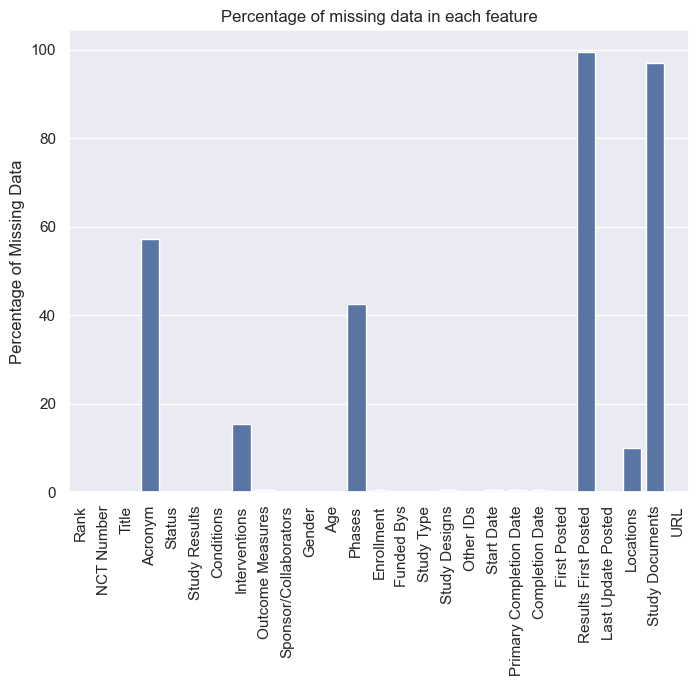

In [67]:
visualize_data(missing_data,'Percentage of missing data in each feature')

As shown the percentage of missing data in Results first Posted is 99.3% and Study Documents is 96.8%, so it's impossible 
to impute without destroying out dataset.

In [68]:
#Drop Study Documents and Results First Posted
df.drop(['Results First Posted','Study Documents','Rank'],inplace = True , axis = 1)

In [69]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [70]:
#Drop Duplicate Rows
df.shape

(5783, 24)

In [71]:
df.drop_duplicates(inplace = True)

In [73]:
df.shape

(5783, 24)

There is no Duplicate rows in the dataset

In [5]:
df.isnull().mean()*100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [78]:
#we can extract a new feature form the location which is the country where the study hold

countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country']=countries

In [79]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [81]:
df.Country.value_counts()[:35]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South

**Now We need to clasify the missing data to one of these categories**

1. Missing Completely at random(MCAR)
2. Missing at Random(MAR)
3. Not Missing at Random(NMAR)

In [84]:
#Let's start with Acronym 
print(f"Number of unique values is {df.Acronym.nunique()}")
df.Acronym.value_counts()

Number of unique values is 2338


Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [88]:
#Find the relation between null values in Acronym and Countries
(df.Acronym.isnull().groupby(df.Country).mean()*100)[:60]

Country
Albania                     0.000000
Algeria                     0.000000
Argentina                  57.446809
Australia                  53.846154
Austria                    62.068966
Azerbaijan                100.000000
Bahrain                   100.000000
Bangladesh                 80.000000
Barbados                    0.000000
Belarus                   100.000000
Belgium                    47.252747
Bolivia                    50.000000
Bosnia and Herzegovina    100.000000
Brazil                     59.124088
Bulgaria                  100.000000
Burkina Faso                0.000000
Cambodia                  100.000000
Cameroon                    0.000000
Canada                     55.940594
Cape Verde                100.000000
Chile                      64.705882
China                      87.134503
Colombia                   51.515152
Costa Rica                 33.333333
Croatia                    50.000000
Cyprus                    100.000000
Czechia                    33.

After inspecting the relation between the missing values in Acronym and Country we can conclude that there is a sort 
of relation . So we can impute by Missing Category

In [90]:
#impute by a missing indicator
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [6]:
df.isnull().mean()*100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

We can do the same for other categorical features such as interventions , phases , locations and other categorical features 

In [95]:
categorical_feature = df.select_dtypes(include = object).columns
features = categorical_feature[df[categorical_feature].isnull().mean()>0]
for i in features:
    df[i] = df[i].fillna(f"Missing{i}")

In [96]:
df.isnull().mean()*100

NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Study Results              0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Other IDs                  0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
First Posted               0.00000
Last Update Posted         0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

Now the Time to handle The missing data for the Enrollment

In [97]:
#check the skewness
df.Enrollment.skew()

34.06593382031148

The value of Skewness is 34 which means that this feature is isn't normally distributed 

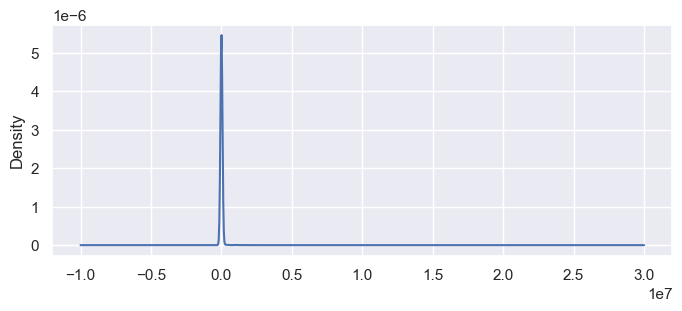

In [105]:
#Plotting the distribution of the enrollment 
plt.figure(figsize=(8,3))
df.Enrollment.plot(kind='kde')
plt.show()

So we will impute by the medain

In [107]:
#some statstical values for the enrollment column 
df.Enrollment.describe()

count    5.749000e+03
mean     1.831949e+04
std      4.045437e+05
min      0.000000e+00
25%      6.000000e+01
50%      1.700000e+02
75%      5.600000e+02
max      2.000000e+07
Name: Enrollment, dtype: float64

In [109]:
median_value = df.Enrollment.median()
df.Enrollment = df.Enrollment.fillna(median_value)

In [110]:
#Check null values
df.isnull().mean()*100

NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last Update Posted         0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

In [111]:
df.head(5)

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
0,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
1,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
3,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
4,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


**Data Visualizations**

Univariate Analysis 
1. Status Distribution
2. Phase Distribution
3. Age Group Analysis

Bivariate Analysis
1. Status vs Phases
2. Conditions vs Outcome Measures
3. Time Series Analysis

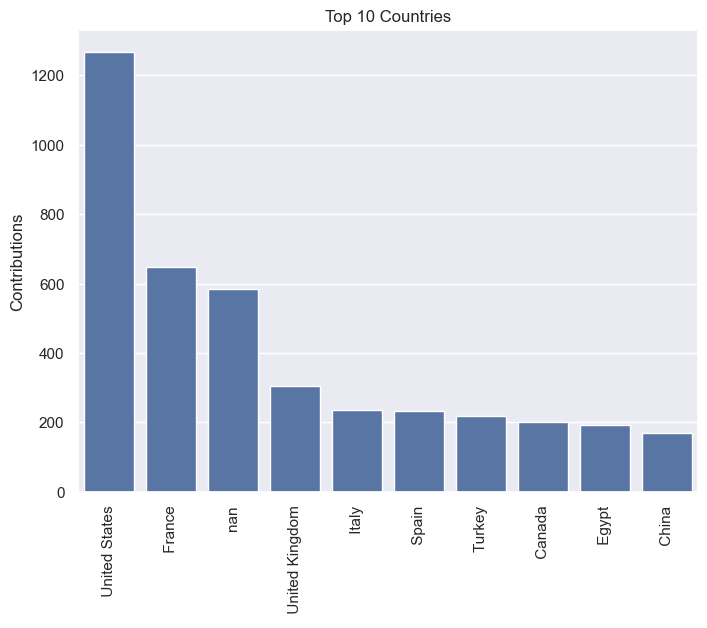

In [112]:
#Get Countries with highest Contributions
top_10_Countries = df.Country.value_counts()[:10]
visualize_data(top_10_Countries , caption = 'Top 10 Countries' , ylabel = 'Contributions')

As we seen that our top 10 countrys in this plot and topped country is United States .

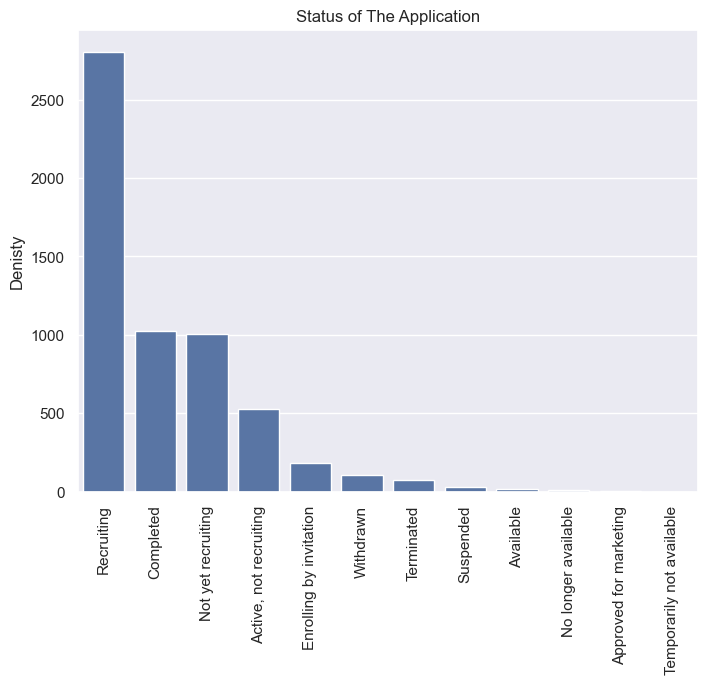

In [116]:
#Status of the Application 
status = df.Status.value_counts()
visualize_data(status , caption = 'Status of The Application', ylabel = 'Denisty') 

The Status of Application is mostly in Recruititng form , and many are of these in completed state . 

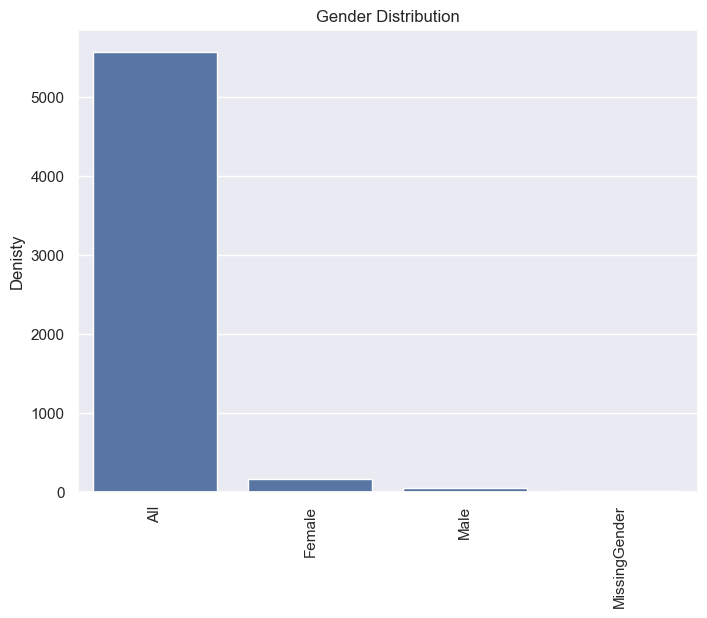

In [117]:
#Gender Visualiztions
gender = df.Gender.value_counts()
visualize_data(gender,caption = 'Gender Distribution',ylabel = 'Denisty')

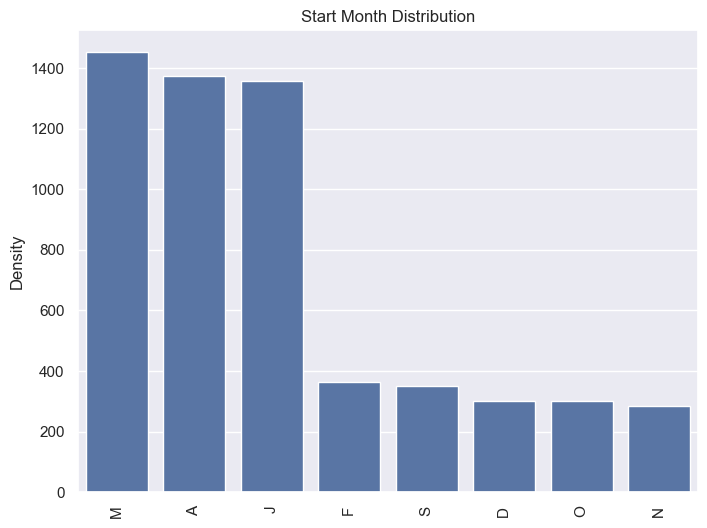

In [126]:
#Which month has the highest start
start_month = pd.Series([str(df['Start Date'].iloc[i])[0]for i in range(df.shape[0])])
start_month_Distribution = start_month.value_counts()

visualize_data(start_month_Distribution , caption = 'Start Month Distribution',ylabel = 'Density')

**Conclusion**

Findings from your EDA :
1. The majority of trials are in the "Completed" phase and "Recruiting" .
2. Most trials target adult populations .
3. There's a steady increase in the number of trials over time .
4. Top Countrys where most of the trails are held in United States,France and United Kingdom .